Mean Squared Error: 98394.88
R-squared: 0.05
Ridge Regression Coefficients: [-57.0266358   -7.57318742 -68.53264202]


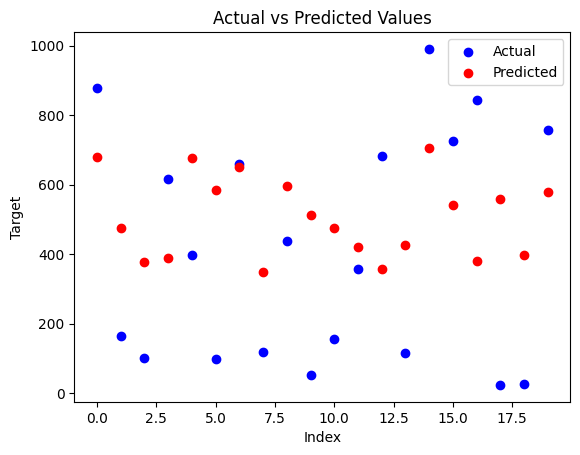

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
data = {
    'feature1': np.random.rand(100),   # Random feature 1
    'feature2': np.random.rand(100),   # Random feature 2
    'feature3': np.random.rand(100),   # Random feature 3
    'target': np.random.rand(100) * 1000  # Continuous target variable
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Split the data into features (X) and target (y)
X = df[['feature1', 'feature2', 'feature3']]  # Features
y = df['target']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardise the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Alpha controls the regularisation strength
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Coefficients
print("Ridge Regression Coefficients:", ridge_model.coef_)

# Visualise actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
